<a href="https://colab.research.google.com/github/dnjswnsthd/bnk_py/blob/develop/2_linear_model_lab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Linear Model</h1>

# import


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer, make_classification, load_boston
from sklearn.model_selection import train_test_split

# Linear Regression

## 최소 제곱법(Least Sqaure)


### 직접 구현 실습
* `X = np.array([10,9,3,2]) `
* `y = np.array([90,80,50,30])`

6.6 22.900000000000006


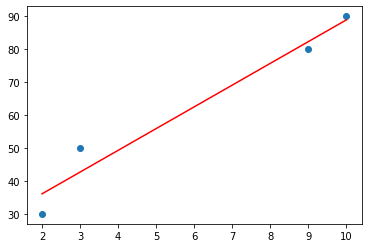

In [ ]:
X = np.array([10,9,3,2]) 
y = np.array([90,80,50,30])

plt.plot(X, y, 'o')

a = np.sum((X - X.mean()) * (y-y.mean())) / np.sum( (X-X.mean())**2)
b = y.mean() - a*X.mean()

print(a, b)
y_pred = a*X+b
plt.plot(X, y_pred, 'r-')

* x = 7일 때 예측

In [ ]:
a * 7 + b

69.1

##  `LinearRegression()`
* `sklearn.linear_model.LinearRegression(fit_intercept, normalize)`
    * OLS(Oerdinary Least Sqaures) 최소 제곱 추정 방식 구현
    * `fit_intercept=True` : bias 사용 여부
    * `normalize = False` : 수행 전에 입력 데이타 정규화, `fit_inercept=False`인 경우 무시
    * `coef_` :  W 계수
    * `intercept_` : bias 절편

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
a = lr.coef_
b = lr.intercept_

print(a, b)

[6.6] 22.899999999999977


* x = 7 일 때 예측

In [ ]:
a*7+b, lr.predict([[7]])

(array([69.1]), array([69.1]))

## 이상치를 포함한 데이터

a:3.4285714285714284, b:34.0


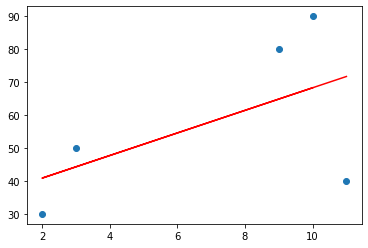

In [ ]:
X2 = np.array([10,9,3,2, 11]) 
y2 = np.array([90,80,50,30, 40])

plt.plot(X2, y2, 'o')

a = np.sum( (X2-X2.mean()) * (y2-y2.mean())) /  np.sum( (X2-X2.mean())**2 )
b = y2.mean() - a*X2.mean()
print(f"a:{a}, b:{b}")

plt.plot(X2, X2*a+b, 'r-' )
plt.show()

# Gradient Descent, 실습
#### 샘플 데이타 생성
* 단순화 하기 위해서 계수 1개만으로 제한
* m개의 샘플 데이타를 만든다.
* X 데이타 : np.arange(m) 
    * 0 ~ m
* y 데이타 : X * 2
    * 데이타가 너무 정직해서 약간의 노이즈를 추가

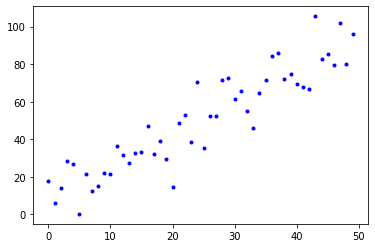

In [ ]:
np.random.seed(0)
m = 50 #sample count
X = np.arange(m)
y = X  * 2 # W = 2, b=0(bias 생략) 
y = y + 10 * np.random.randn(m) # adding noise

plt.plot(X, y, 'b.')
plt.show()

#### 선형 회귀선 표시
* 데이타의 선회 회귀를 직선으로 표시
* 최종적으로 이 선을 만족하는 W를 찾으면 성공

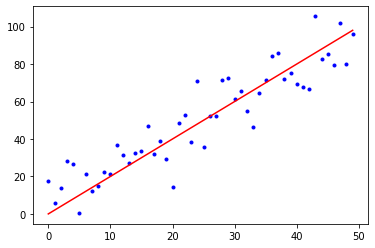

In [ ]:
plt.plot(X, y, 'b.')
plt.plot(X, X*2, 'r')
plt.show()

#### Hypothesis와 Cost함수

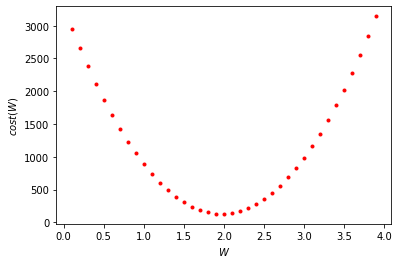

In [ ]:
w_range = np.arange(0.1, 4, 0.1) 
costs = np.array([])
for i, w in enumerate(w_range):
    h = w*X
    cost = 1/m * np.sum( (h - y)**2)
    costs = np.append(costs, cost)
plt.plot(w_range, costs, 'r.')
plt.xlabel('$W$')
plt.ylabel('$cost(W)$')
plt.show()

#### Cost 함수와 Gradient

* `plt.plot(w_range, gradient*(w_range-w) +cost) #gradient는 원점을 기준으로 계산되기 때문에 `

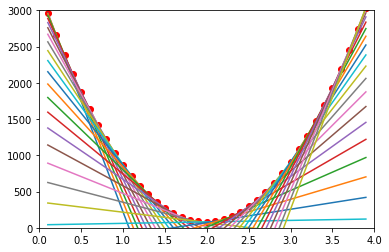

In [ ]:
plt.plot(w_range, costs, 'ro')
for w, cost in zip(w_range, costs):
    h = w*X
    gradient =  2/m * np.sum( (h-y) * X)
    plt.plot(w_range, gradient*(w_range-w) +cost) #gradient는 원점을 기준으로 계산되기 때문에
    plt.axis([0, 4, 0, 3000])
plt.show()

#### Batch Gradient Descent
* 전체 샘플에 대해서 경사 하강법을 이용해서 예측

epoch:0 cost:1757.134425887178, gradient:-2295.454695678768, W:0.6635862387112632
epoch:20 cost:183.75332759571535, gradient:-425.2032314542253, W:1.7266917633507117
epoch:40 cost:129.7662784911078, gradient:-78.76338765451109, W:1.9236182830962327
epoch:60 cost:127.91383379465871, gradient:-14.58989672679054, W:1.960096368554621
epoch:80 cost:127.85027130309244, gradient:-2.7025892719615503, W:1.9668534611007598
epoch:100 cost:127.84809029853024, gradient:-0.5006196349222006, W:1.9681051249176333
epoch:120 cost:127.8480154622426, gradient:-0.09273329894046867, W:1.9683369794171497
epoch:140 cost:127.84801289440298, gradient:-0.017177641730981463, W:1.9683799274581664
epoch:160 cost:127.84801280629333, gradient:-0.003181935494984032, W:1.9683878830261234
epoch:180 cost:127.84801280327004, gradient:-0.0005894123097363035, W:1.9683893566919775
suspened: 200


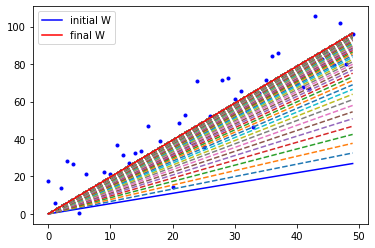

In [ ]:
plt.plot(X, y, 'b.')
np.random.seed(0)
W = np.random.rand()
plt.plot(X, W*X, 'b-', label='initial W')

epochs = 1000
lr = 0.00005
suspend = 0.00001
old_g = None
for epoch in range(epochs):
  h = W*X
  err = h - y
  cost = 1/m * np.sum(err**2)
  g = 2/m * np.sum(err*X )
  if old_g is not None and abs(g - old_g) < suspend:
    print('suspened:', epoch)
    break
  old_g = g
  W = W - g*lr
  plt.plot(X, W*X, '--')
  if epoch %20==0:
    print(f'epoch:{epoch} cost:{cost}, gradient:{g}, W:{W}')

plt.plot(X, W*X, 'r-', label='final W')
plt.legend();

#### Stochastic Gradient Descent


initial W 0.5488135039273248
epoch:0, cost:55.95061574469787, gradient:418.8808075996948, W:2.3956837125791512, learn_rate:0.001
epoch:5, cost:76.30243532980313, gradient:87.35126520537818, W:1.768861094299234, learn_rate:0.0002702702702702703
epoch:10, cost:51.874355186484266, gradient:-201.66679068751915, W:1.8340995035990066, learn_rate:0.00015625
epoch:15, cost:1.3814141005393965, gradient:63.46812993284803, W:1.9672290816804505, learn_rate:0.00010989010989010989
epoch:20, cost:77.42664061888924, gradient:-105.59089093818676, W:2.1258889245447037, learn_rate:8.474576271186441e-05
epoch:25, cost:3.381155442033148, gradient:29.420669488651782, W:2.0987964039492724, learn_rate:6.896551724137931e-05
epoch:30, cost:0.22927511158601674, gradient:-45.00971990552756, W:2.157852519729777, learn_rate:5.8139534883720933e-05
epoch:35, cost:276.164312205118, gradient:-930.6187635521057, W:2.0006790454624346, learn_rate:5.0251256281407036e-05
epoch:40, cost:68.10758179633213, gradient:-610.70215

(0.0, 50.0, 0.0, 100.0)

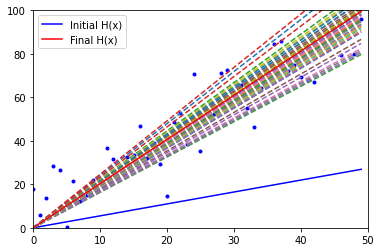

In [ ]:
plt.plot(X, y, 'b.')
np.random.seed(0)
W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)
t0, t1 = 1, 1000
epochs = 50
batches = 1
for epoch in range(epochs):
    for i in range(m):
        idx = np.random.randint(0,m, batches)
        x_i, y_i = X[idx], y[idx]
        h = W*x_i
        cost =  np.sum((h-y_i)**2)
        gradient = 2* np.sum((h-y_i) * x_i)
        learning_rate = t0/(t1 + (epoch * (m + i*10)))
        #learning_rate = 0.0005
        W = W - learning_rate * gradient
    plt.plot(X, W*X, '--')    
    if epoch %5 ==0:
        print(f'epoch:{epoch}, cost:{cost}, gradient:{gradient}, W:{W}, learn_rate:{learning_rate}')
        
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()
plt.axis([0, 50, 0, 100])

#### `SDGRegressor()`

[0.85473268] [0.00031498]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


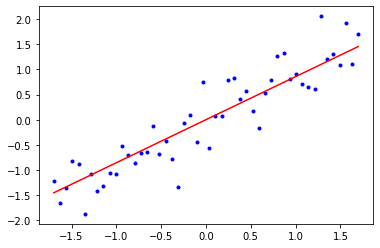

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
m = 50 #sample count
X = np.arange(m, dtype=np.float32).reshape(-1,1)
y = X  * 2 # W = 2, b=0(bias 생략) 
y = y + 10 * np.random.randn(m,1) # adding noise

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

plt.plot(X, y, 'b.')

#gd = SGDRegressor(learning_rate='constant', eta0=0.00005)
gd = SGDRegressor()
gd.fit(X, y)
a = gd.coef_
b = gd.intercept_

print(a, b)
plt.plot(X, X*a+b, 'r-')

# 회귀 평가 지표

In [ ]:
y_true = np.array([10,20,30,40,50])
y_pred1 = np.array([8,22,32,38,52])
y_pred2 = np.array([10,21,28,37,54])
y_pred3 = np.array([10,20,30,40,40])

mae1 = mean_absolute_error(y_true, y_pred1)
mse1 = mean_squared_error(y_true, y_pred1)
rmse1 = mean_squared_error(y_true, y_pred1, squared=False)
r2_1 = r2_score(y_true, y_pred1)

print(f'error: {y_true - y_pred1}, mae:{mae1}, rmse:{rmse1}, mse:{mse1}, r2:{r2_1}')

error: [ 2 -2 -2  2 -2], mae:2.0, rmse:2.0, mse:4.0, r2:0.98


In [ ]:

mae2 = mean_absolute_error(y_true, y_pred2)
mse2 = mean_squared_error(y_true, y_pred2)
rmse2 = mean_squared_error(y_true, y_pred2, squared=False)
r2_2 = r2_score(y_true, y_pred2)



print(f'error: {y_true - y_pred2}, mae:{mae2}, rmse:{rmse2}, mse:{mse2}, r2:{r2_2}')

error: [ 0 -1  2  3 -4], mae:2.0, rmse:2.449489742783178, mse:6.0, r2:0.97


In [ ]:
mae3 = mean_absolute_error(y_true, y_pred3)
mse3 = mean_squared_error(y_true, y_pred3)
rmse3 = mean_squared_error(y_true, y_pred3, squared=False)
r2_3 = r2_score(y_true, y_pred3)


print(f'error: {y_true - y_pred3}, mae:{mae3}, rmse:{rmse3}, mse:{mse3}, r2:{r2_3}')

error: [ 0  0  0  0 10], mae:2.0, rmse:4.47213595499958, mse:20.0, r2:0.9


# 보스톤 주택가격, 회귀 예제
* `boston = load_boston()`


In [ ]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df[::50]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4


In [ ]:
boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("===========Linear Regression==========")
print('train score:', lr.score(X_train, y_train), 'test score:', lr.score(X_test, y_test))
print('R2:', r2_score(y_test, y_pred), 'MAE:', mean_absolute_error(y_test, y_pred),
      'RMSE:', mean_squared_error(y_test, y_pred, squared=False))

gd = SGDRegressor()
gd.fit(X_train, y_train )
y_pred = gd.predict(X_test)

print("===========SGDRegression==========")
print('train score:', gd.score(X_train, y_train), 'test score:', gd.score(X_test, y_test))
print('R2:', r2_score(y_test, y_pred), 'MAE:', mean_absolute_error(y_test, y_pred),
      'RMSE:', mean_squared_error(y_test, y_pred, squared=False))

===========Linear Regression==========
train score: 0.7697699488741149 test score: 0.6354638433202129
R2: 0.6354638433202129 MAE: 3.6683301481357162 RMSE: 5.457311159564054
===========SGDRegression==========
train score: 0.7686061089195141 test score: 0.636144482618145
R2: 0.636144482618145 MAE: 3.6375048564030212 RMSE: 5.45221400275089


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

#  다항 회귀(Polynomial Variable Regression)


## 다차항 변환의 의미

Text(0, 0.5, 'y')

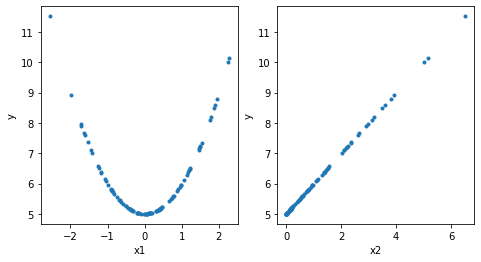

In [ ]:
np.random.seed(0)
x1 = np.random.randn(100)
y = np.random.randint(1,10) * x1**2 + np.random.randint(1, 10)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(x1, y, '.')
plt.xlabel('x1')
plt.ylabel('y')

x2 =  x1**2 
plt.subplot(1,3,2)
plt.plot(x2, y, '.')
plt.xlabel('x2')
plt.ylabel('y')

Text(0.5, 0, 'x2')

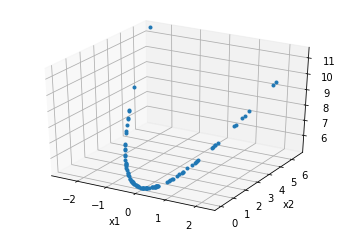

In [ ]:
fig, axs = plt.subplots(subplot_kw={"projection":"3d"})

plt.plot(x1, x2, y, '.')
plt.xlabel('x1')
plt.ylabel('x2')

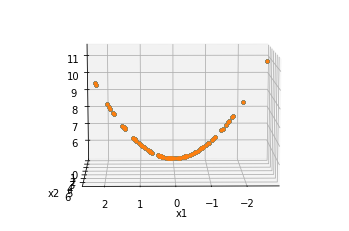

In [ ]:
from matplotlib import animation, rc
rc('animation', html='html5')
fig, axs = plt.subplots(subplot_kw={"projection":"3d"})

def update(i):
  ax, = plt.plot(x1, x2, y, '.')
  plt.xlabel('x1')
  plt.ylabel('x2')
  axs.view_init(ele v=10., azim=i)
  return [ax]    

animation.FuncAnimation(fig, update, frames=90, interval=20, blit=True)

## `PolynomialFeatures()` 

In [ ]:
from sklearn.preprocessing  import PolynomialFeatures

x = np.arange(10).reshape(-1,2)
poly = PolynomialFeatures(2, include_bias=False)
poly.fit(x)
x_poly = poly.transform(x)
x_poly

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.],
       [ 6.,  7., 36., 42., 49.],
       [ 8.,  9., 64., 72., 81.]])

## 다항식 샘플 생성
* $x = \text{random}(-3, 2, 100)$
* $y = 2x^2 + 3x + 5$

(100, 1) (100, 1)
[[-0.25593248]
 [ 0.57594683]
 [ 0.01381688]
 [-0.27558409]
 [-0.881726  ]]


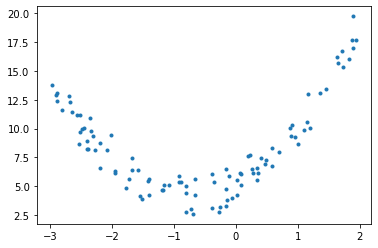

In [ ]:
np.random.seed(0)
m = 100
X = np.random.rand(m,1) *5 -3
y = 2*X**2 + 3*X + 5 + np.random.randn(m,1) # 2x^2 + 3x + 5 + noise
plt.plot(X, y, '.')
print(X.shape, y.shape)
print(X[:5])

* `PolynomialFeatures`
* `LinearRegression`

(100, 3) [[ 1.00000000e+00 -2.55932480e-01  6.55014345e-02]
 [ 1.00000000e+00  5.75946832e-01  3.31714753e-01]
 [ 1.00000000e+00  1.38168804e-02  1.90906183e-04]
 [ 1.00000000e+00 -2.75584085e-01  7.59465879e-02]
 [ 1.00000000e+00 -8.81726003e-01  7.77440745e-01]]
W: [[5.30986383 2.90257368 1.92769505]] b: 0.0


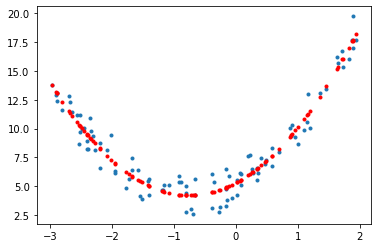

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.plot(X, y, '.')
poly = PolynomialFeatures(2, include_bias=True)
X_poly = poly.fit_transform(X)
print(X_poly.shape, X_poly[:5])

lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly, y)
print('W:', lr.coef_, 'b:', lr.intercept_)

y_pred = lr.predict(X_poly)
plt.plot(X, y_pred, 'r.')


#X_range = np.linspace(-3, 2, 100).reshape(-1,1)
#y_pred2 = lr.predict(poly.transform(X_range))
#plt.plot(X_range, y_pred2, 'g-')


# 규제화

## 다항 회귀와 과적합

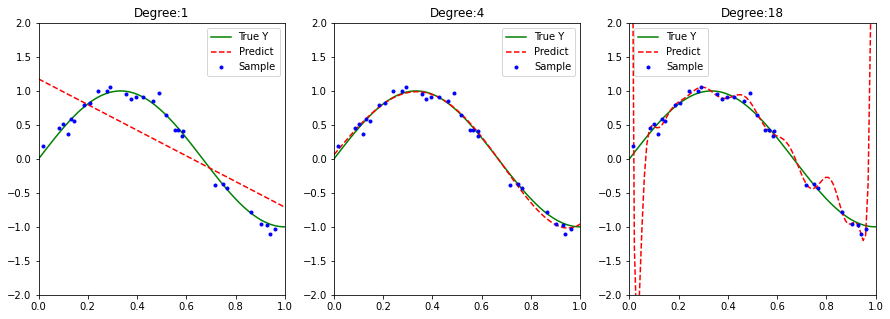

In [ ]:
def sin(X):
    return np.sin(1.5 * np.pi * X)


m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

degrees = (1, 4, 18)
plt.figure(figsize=(15,5))

for i, degree  in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    pipe = Pipeline([('poly', poly), ('linear_regression', lr)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(degrees), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:{degree}")
    
plt.show()

## Ridge(릿지) 모델
* degree=18 
* Ridge 규제
  * alphas = (0, 0.01, 0.5, 1)

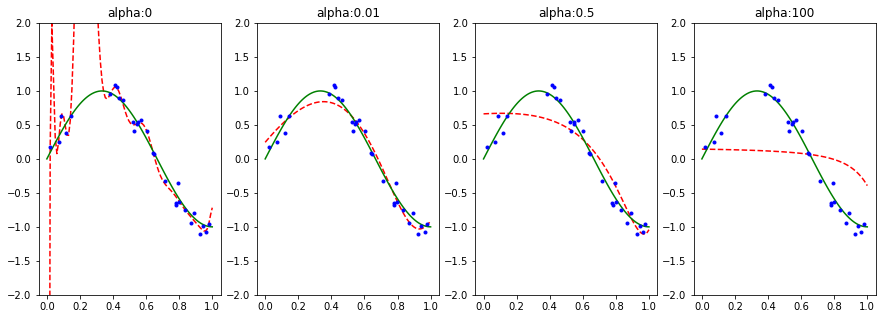

,alpha:0,alpha:0.01,alpha:0.5,alpha:100
0,5.625640e+03,2.884445,0.134813,-0.037307
1,-2.574048e+05,-2.173321,-0.486242,-0.046358
2,6.303114e+06,-2.713501,-0.651175,-0.047013
3,-9.465730e+07,-1.759644,-0.603123,-0.044703
4,9.421357e+08,-0.688621,-0.484267,-0.041444
5,-6.541650e+09,0.100600,-0.354825,-0.038053
6,3.286253e+10,0.569301,-0.237252,-0.034850
7,-1.226001e+11,0.782934,-0.138042,-0.031946
8,3.458363e+11,0.820273,-0.057337,-0.029355
9,-7.458985e+11,0.746597,0.006963,-0.027061


In [ ]:
from sklearn.linear_model import Ridge

np.random.seed(0)
m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1


alphas = (0, 0.01, 0.5, 100)
plt.figure(figsize=(15,5))
coef_df = pd.DataFrame()
for i, alpha  in enumerate(alphas):
  poly = PolynomialFeatures(degree=18, include_bias=False)
  ridge = Ridge(alpha=alpha)
  pipe = Pipeline([('poly', poly), ('ridge', ridge)])
  pipe.fit(X.reshape(-1,1), y)

  X_test = np.linspace(0, 1, 100)
  plt.subplot(1, len(alphas), i+1)
  plt.plot(X_test, pipe.predict(X_test.reshape(-1,1)), 'r--')
  plt.plot(X_test, sin(X_test), 'g-')
  plt.plot(X, y, 'b.')
  plt.title(f'alpha:{alpha}')
  plt.ylim((-2,2))
  coef_df[f'alpha:{alpha}'] = ridge.coef_
plt.show()
coef_df  


## LASSO(라쏘) 모델


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.288e-02, tolerance: 1.514e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


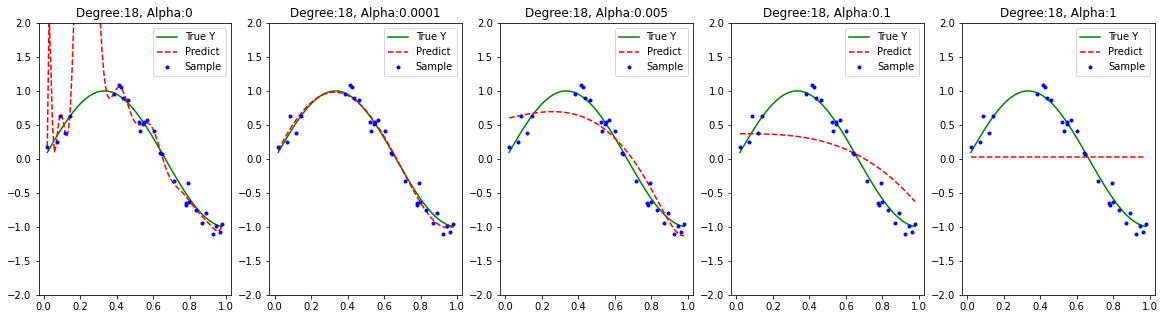

,alpha: 0,alpha: 0.0001,alpha: 0.005,alpha: 0.1,alpha: 1
0,5.884074e+03,5.711224,0.604269,-0.000000,-0.0
1,-2.682698e+05,-7.712134,-0.000000,-0.000000,-0.0
2,6.549537e+06,-2.191474,-3.007939,-1.063943,-0.0
3,-9.813562e+07,-0.000000,-0.000000,-0.000000,-0.0
4,9.751677e+08,0.487948,-0.000000,-0.000000,-0.0
5,-6.763444e+09,1.445757,-0.000000,-0.000000,-0.0
6,3.395229e+10,1.005549,0.000000,-0.000000,-0.0
7,-1.266140e+11,0.487221,0.000000,-0.000000,-0.0
8,3.571018e+11,0.045472,0.000000,-0.000000,-0.0
9,-7.702294e+11,0.000000,0.000000,-0.000000,-0.0


In [ ]:
np.random.seed(0)
def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

alphas = (0, 0.0001, 0.005, 0.1, 1)
plt.figure(figsize=(20,5))
coef_df = pd.DataFrame()
for i, alpha  in enumerate(alphas):
    poly = PolynomialFeatures(degree=18, include_bias=False)
    if alpha==0:
      reg = LinearRegression()
    else:
      reg = Lasso(alpha=alpha)
    pipe = Pipeline([('poly', poly), ('reg', reg)])
    pipe.fit(X.reshape(-1,1), y)
    X_test = np.linspace(X.min(),X.max(), 100)
    plt.subplot(1, len(alphas), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:18, Alpha:{alpha}")
    series = pd.Series(data=reg.coef_)
    coef_df[f'alpha: {alpha}'] = series 
plt.show()
display(coef_df)

# Logistic Regression


#### Sigmoid 함수 그리기

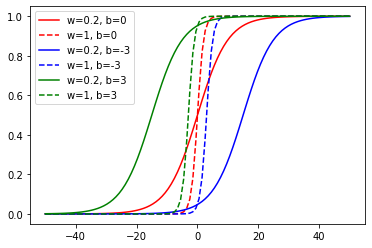

In [ ]:
def sigmoid(z):
    return  1/(1+np.exp(-z))

def drawSigmoid(w, b, style):
    x=np.linspace(-50,50,100).reshape(-1,1)
    y = sigmoid(x * w + b)
    plt.plot(x, y, style, label=f'w={w}, b={b}')
    
drawSigmoid(w=0.2, b=0, style='r-')
drawSigmoid(w=1,  b=0, style='r--')

drawSigmoid(w=0.2, b=-3, style='b-')
drawSigmoid(w=1, b=-3, style='b--')

drawSigmoid(w=0.2, b=3, style='g')
drawSigmoid(w=1,  b=3, style='g--')
plt.legend()

#### 로지스틱 회귀 실습: 랜덤수 분류

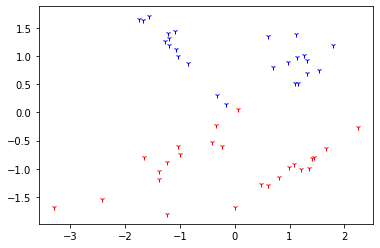

In [ ]:
X, y = make_classification(n_samples=50, n_features=2,
                           n_informative =2, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0)

plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1') # 0 : red
plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1') # 1 : blue

*  LogisticRegression()

acc: 1.0


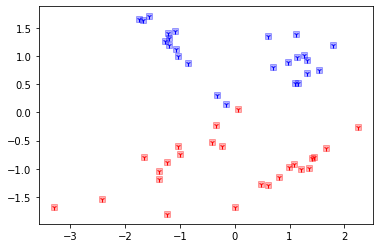

In [ ]:
plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1')
plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1')

lr = LogisticRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

acc = accuracy_score(y, y_pred)
print('acc:', acc)

plt.plot(X[y_pred==0][:,0],X[y_pred==0][:,1], 'rs', alpha=0.3)
plt.plot(X[y_pred==1][:,0],X[y_pred==1][:,1], 'bs', alpha=0.3)

#### 로지스틱 회귀 실습: 위스콘신 유방암 

* load_breast_cancer()

In [ ]:
cancer = load_breast_cancer()
scaler = StandardScaler()
scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(scaled, cancer.target, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Train acc:', lr.score(X_train, y_train), 'Test Acc:', lr.score(X_test, y_test) )


Train acc: 0.9906103286384976 Test Acc: 0.965034965034965
